In [1]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [3]:
# Read in dataset from github 
rosters = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-01-09/nhl_rosters.csv")
rosters.to_csv('data/nhl_rosters.csv')

In [4]:
# Check for NAs
rosters["shoots_catches"].unique()

array(['L', 'R', nan], dtype=object)

In [5]:
# Drop NA records
rosters = rosters[["weight_in_kilograms","height_in_centimeters","shoots_catches"]]
rosters = rosters.dropna()

In [6]:
rosters["shoots_left"] = rosters["shoots_catches"].replace({'L': 1, 'R': 0})
rosters = rosters.drop("shoots_catches", axis = 1)

C:\Users\jaysi\AppData\Local\Temp\ipykernel_44748\3455645111.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rosters["shoots_left"] = rosters["shoots_catches"].replace({'L': 1, 'R': 0})


In [7]:
rosters

,weight_in_kilograms,height_in_centimeters,shoots_left
0,84.0,183.0,1
1,87.0,173.0,0
2,93.0,185.0,1
3,98.0,193.0,1
4,98.0,185.0,1
...,...,...,...
54878,91.0,185.0,0
54879,92.0,188.0,1
54880,93.0,191.0,0
54881,88.0,191.0,1


In [8]:
alt.Chart(rosters).mark_bar().encode(
    alt.X("weight_in_kilograms").bin(),
    alt.Y("count()")
).facet(
    "shoots_left"
)

alt.FacetChart(...)

In [10]:
alt.Chart(rosters).mark_bar().encode(
    alt.X("height_in_centimeters").bin(),
    alt.Y("count()")
).facet(
    "shoots_left"
)

alt.FacetChart(...)

In [11]:
train_df, test_df = train_test_split(rosters, test_size=0.3, random_state=123)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38200 entries, 22925 to 53045
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   weight_in_kilograms    38200 non-null  float64
 1   height_in_centimeters  38200 non-null  float64
 2   shoots_left            38200 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


In [13]:
# Lists of feature names
numeric_features = ["weight_in_kilograms","height_in_centimeters"]

# Create the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
)

# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['weight_in_kilograms',
                                  'height_in_centimeters'])])

In [14]:
X_train = train_df.drop(columns=["shoots_left"])
X_test = test_df.drop(columns=["shoots_left"])
y_train = train_df["shoots_left"]
y_test = test_df["shoots_left"]


In [15]:
logreg = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000,class_weight="balanced"))
logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['weight_in_kilograms',
                                                   'height_in_centimeters'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=123))])

In [16]:
logreg.score(X_test, y_test)

0.5155753725873442

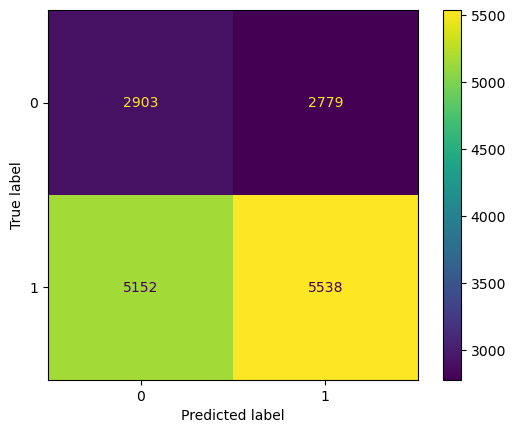

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay 

cm = ConfusionMatrixDisplay.from_estimator(
    logreg,
    X_test,
    y_test,
    values_format="d",  # Show the full number 59,700 instead of 6e+04
)